In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [4]:
iris = load_iris()
X = iris.data
y = iris.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

1.0


In [6]:
# simulate splitting a dataset of 25 observations into 5 folds
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False).split(range(25))

# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


In [7]:
from sklearn.model_selection import cross_val_score


In [8]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [9]:
print(scores.mean())

0.9666666666666668


In [10]:
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)    

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0, 0.5, 'cross-validation accuracy')

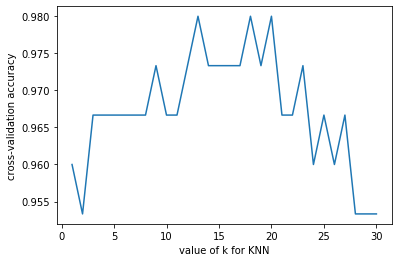

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range,k_scores)
plt.xlabel('value of k for KNN')
plt.ylabel('cross-validation accuracy')

In [12]:
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn,X,y,cv = 10,scoring='accuracy').mean())

0.9800000000000001


In [13]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
print(cross_val_score(logreg,X,y,cv=10,scoring='accuracy').mean())

0.9533333333333334


In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression


In [21]:
data = pd.read_csv(r"E:\Advertising.csv",index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [22]:
feature_cols = ['TV','Radio','Newspaper']
X = data[feature_cols]
y = data.Sales

In [25]:
lm = LinearRegression()
scores = cross_val_score(lm,X,y,cv = 10,scoring='neg_mean_squared_error')
print(scores)


[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [26]:
mse_error = -scores
print(mse_error)

[3.56038438 3.29767522 2.08943356 2.82474283 1.3027754  1.74163618
 8.17338214 2.11409746 3.04273109 2.45281793]


In [28]:
rmse_scores = np.sqrt(mse_error)
print(rmse_scores)

[1.88689808 1.81595022 1.44548731 1.68069713 1.14139187 1.31971064
 2.85891276 1.45399362 1.7443426  1.56614748]


In [29]:
print(rmse_scores.mean())

1.6913531708051792


In [31]:
feature_cols = ['TV','Radio']
X = data[feature_cols]
print(np.sqrt(-cross_val_score(lm,X,y,cv=10,scoring='neg_mean_squared_error')).mean())

1.6796748419090766
